# Supervised Learning - Regression
Week 2 Lab

In [1]:
# Required imports
import numpy as np
import matplotlib.pyplot as plt

## 0) OLS
Taken from https://github.com/jermwatt/machine_learning_refined

In [2]:
# import the dataset
csvname =  'student_debt_data.csv'
data = np.loadtxt(csvname,delimiter=',')

# extract input - for this dataset, these are times
x = data[:,0]

# extract output - for this dataset, these are total student debt
y = data[:,1]

print(np.shape(x))
print(np.shape(y))

(40,)
(40,)


1) Find $\theta$ that minimizes the sum-of-squared error cost function

In [3]:
# First, we have to create an array of x0 that is all 1. Remember from the lecture we have $h = theta_0 + theta_i * x_1 + ... + theta_n * x_n. The x_0 term is 1.
# I completely missed this part in the lecture when we wrote down X in matrix form, as well as when we were going through the lab just now. This was why we got a huge value
# of theta that resulted in a prediction with enormous error.
x0 = np.empty((np.shape(x)))
x0[:] = 1

# Just to be consistent with notation, x in the data here will be the x1 component.
x1 = x

# Combine x0 and x1 into a single X matrix
# to transpose a matrix M, we can either use np.transpose(M) or M.T
X = np.vstack((x0, x1))
X = X.T # the shape of X is n x d (# samples x # features) = 40 x 2
print(f'Shape of X is {np.shape(X)}')

# Confim that the shape of Y is n x 1 (# samples x 1) = 40 x 1
Y = y
print(f'Shape of Y is {np.shape(Y)}')

# Calculate theta using closed form OLS solution
theta = np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ Y
print(f'Shape of theta is {np.shape(theta)}')
print(f'Theta is {theta}')

Shape of X is (40, 2)
Shape of Y is (40,)
Shape of theta is (2,)
Theta is [-1.60729045e+02  8.03244175e-02]


2) Plot x, y, and the prediction function with $\theta$ found in Question 1)

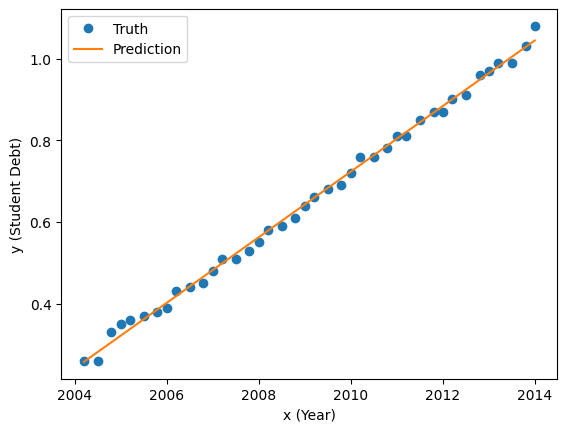

In [4]:
# Ploting x, y, and prediction
y_hat = X @ theta

plt.figure()
plt.plot(x1, y, 'o')
plt.xlabel('x (Year)')
plt.ylabel('y (Student Debt)')

plt.plot(x1, y_hat)
plt.legend(['Truth', 'Prediction'])

3) Plot the error between prediction and actual y

Text(0, 0.5, 'error')

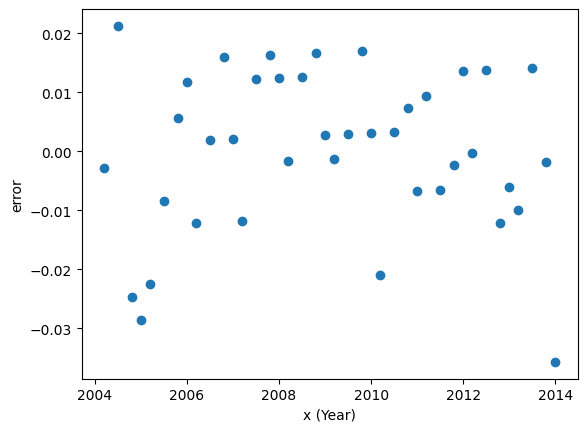

In [5]:
# Error between prediction and actual values
error = y_hat - y 

plt.plot(x, error, 'o')
plt.xlabel('x (Year)')
plt.ylabel('error')

## 1) LMS
Let's implement least means square fitting manually, and check to see how different parameters affect learning

### a) Create a pseudo-random dataset
Instead of using "real" data, in this exercise we will fabricate a simple data with correlation between x and y to further understand input and output relationships and how a model can predict them.

Given the array `x` in space $\mathbb{R}^{\text{nxd}}$ with `n` samples and `d` features, generate `y` such that it holds some correlation to `x`.

Bonus: later on, we will dealy with arrays with more than 2D. These are called "tensors". A *tensor* is simple a generalized matrix that can be any dimension, not just 2D. We will stick with 2D here for simplicity.

In [6]:
# Set parameters
n = 30 # num samples in dataset
d = 5 # starting very simply with 1 feature only
NOISE_AMPLITUDE = 0.1 # how much noise to inject into dataset

# Generate x values
x = np.random.uniform(-1, 1, (n, d))
print(f'Shape of array x is {x.shape}') # check the shape

# Generate a y value that is somewhat correlated
# There are many ways to do this, let's just write a quick rule that linearly combines the features of x and injects some noise
# Note that we assume an intercept (bias) of 0
theta_true = np.random.uniform(-1,1, (d))

y = x @ theta_true + np.random.normal(0,NOISE_AMPLITUDE,(n)) # the `@` operator is used for numpy matrix multiplication, and is just shorthand for the dot product

# Let's check the correlation to be sure
correlations = [np.corrcoef(x[:, i], y)[0, 1] for i in range(d)] # calculate Pearson's R for each feature vector
print(f'Correlations for each feature are {correlations}')

Shape of array x is (30, 5)
Correlations for each feature are [-0.6753119941867552, 0.19387057481345193, -0.044764120112388825, 0.6767873930517093, -0.5953930516093487]


*Q: What happened to the correlation when noise is zero?*

In [7]:
y = x @ theta_true 
correlations = [np.corrcoef(x[:, i], y)[0, 1] for i in range(d)] # calculate Pearson's R for each feature vector
print(f'Correlations for each feature are {correlations}')

Correlations for each feature are [-0.6713290849906492, 0.1617532094510193, -0.07372339270674949, 0.6854629126486129, -0.597981417817065]


Now, let's increase the number of features d to 5. Pay attention to the correlation between each feature and the output y.
Copying the cells above but with d = 5:

In [8]:
# Set parameters
n = 30 # num samples in dataset
d =  5 # starting very simply with 1 feature only
NOISE_AMPLITUDE = 0.1 # how much noise to inject into dataset

# Generate x values
x = np.random.uniform(-1, 1, (n, d))
print(f'Shape of array x is {x.shape}') # check the shape

# Generate a y value that is somewhat correlated
# There are many ways to do this, let's just write a quick rule that linearly combines the features of x and injects some noise
# Note that we assume an intercept (bias) of 0
theta_true = np.random.uniform(-1,1, (d))

y = x @ theta_true + np.random.normal(0,NOISE_AMPLITUDE,(n)) # the `@` operator is used for numpy matrix multiplication, and is just shorthand for the dot product

# Let's check the correlation to be sure
correlations = [np.corrcoef(x[:, i], y)[0, 1] for i in range(d)] # calculate Pearson's R for each feature vector
print(f'Correlations for each feature are {correlations}')

Shape of array x is (30, 5)
Correlations for each feature are [0.24463503779502282, 0.6626360630983934, -0.5797146930744642, -0.43233463630549324, -0.6050443139847844]


Chances are, some features will have a large correlation whereas others may have little correlation. Note that correlation here is only checking for the existence of a *linear* relationship.

*Q: If we wanted to improve our correlations, is it better to add more data or to reduce the amplitude of noise? Come up with a hypothesis and test it by tuning the parameters above. Experiment with the number of samples, features, and amplitude of noise.*

A:

### b) Visualize Dataset

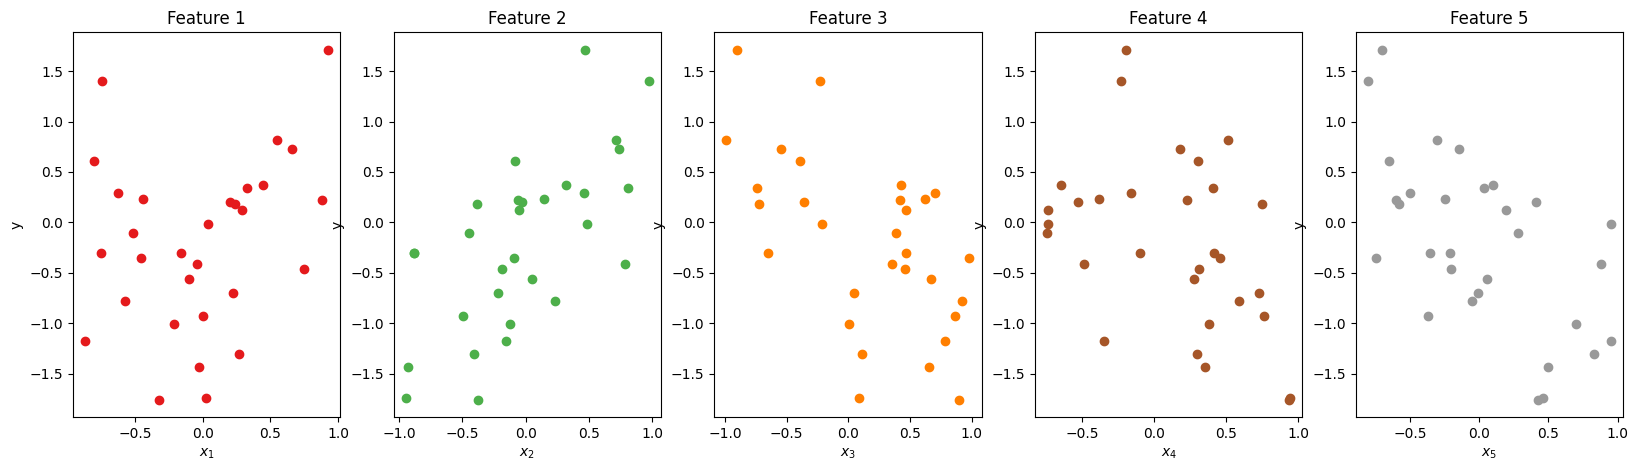

In [9]:
plt.figure(figsize=(20, 1*d))

colors = plt.cm.Set1(np.linspace(0, 1, d)) # make an iterable of colors

for feature in range(d):
    plt.subplot(1, d, feature+1)
    plt.scatter(x[:,feature],y,color = colors[feature])
    plt.title(f"Feature {feature+1}")
    plt.xlabel(f"$x_{feature+1}$")
    plt.ylabel("y")

In [10]:
# for ease of use later, let's wrap up our dataset generation into a function that gives us an x and y given our starting params

def generate_dataset(num_feats: int, num_samples: int, noise_amp: float) -> tuple([np.ndarray, np.ndarray, np.ndarray]):
    x = np.random.uniform(-1, 1, (num_samples, num_feats))
    theta_true = np.random.uniform(-1,1, (num_feats))
    y = x @ theta_true + np.random.normal(0, noise_amp, (num_samples))
    return x, y, theta_true

### c) Least Mean Squares

We will now implement LMS to see if we can recover our true theta (weights)!

We can start by taking a random guess of our true theta (weights). Let's call our random starting weights `θ`

In [11]:
theta = np.random.uniform(-2,2,(d)) # here, we are initializing our weights from a uniform distribution ranging from -2 to 2, but it could start from anywhere
print(f'theta is {theta}')

theta is [-1.20224225  0.77565586 -1.03709239  1.9718601   0.72134227]


Now, we can apply those weights `θ` to our data `x` to calculate our predicted y, or $\hat{y}$

In [12]:
yhat = x @ theta

Then, define the LMS cost function. Here, our cost function we would like to minimize is the *mean squared error* between y and yhat. Let's write a function so that this is easy to compute. We will use good coding practice here as well by properly documenting our function with typings and naming our variables to be easily understood.

In [13]:
def mean_squared_error(x : np.ndarray, y : np.ndarray, theta : np.ndarray) -> np.ndarray:
    yhat = x @ theta # apply weights to data to get prediction yhat
    error = yhat - y # get the error
    loss = (1 / len(y)) * np.sum(error ** 2) # mean squared error
    return loss

# test it out
print(f'Initial loss: {mean_squared_error(x, y, theta)}')

Initial loss: 2.39584243964116


Now we will do gradient descent. This is an iterative algorithm that requires us to take the partial derivative of our loss function, with respect to our parameters θ. Below is the derivation provided again for review.

---

#### __Cost Function__:

The cost function for LMS is defined as the Mean Squared Error (MSE):

$$ J(\theta) = \frac{1}{2n} \sum_{i=1}^{n} (h_{\theta}(x^{(i)}) - y^{(i)})^2 $$
Where:
- $n$ is the number of data points.
- $h_{\theta}(x^{(i)})$ is our hypothesis or prediction for the $i^{th}$ input. 

---

#### __Hypothesis__:

Our hypothesis function is given by:

$$ h_{\theta}(x) = x \cdot \theta $$
Where:
- $x$ is our input vector.
- $\theta$ is our weight vector.

---

#### __Derivation of the Gradient__:

Now, for the step-by-step derivation of the gradient:

1. Start with a single example $i$ inside the summation:

$$ \text{error}^{i} = h_{\theta}(x^{i}) - y^{i} $$

2. Squared error for the $i^{th}$ example:

$$ (\text{error}^{i})^2 = (x^{i} \cdot \theta - y^{i})^2 $$

3. Take the partial derivative with respect to $\theta_j$:

$$ \frac{\partial}{\partial \theta_j} (\text{error}^{i})^2 = 2 (x^{i} \cdot \theta - y^{i}) x_j^{i} $$

4. The above result gives us the gradient of a single squared error term. To get the gradient for the MSE, we need to average over all $n$ training examples and account for the $\frac{1}{2}$ term in front (which conveneniently reduces to 1):

$$ \frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{n} \sum_{i=1}^{n} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} $$

5. The above equation can also be written in matrix form as:

$$ \frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{n} X^T (H_{\Theta}(X) - Y) = \frac{1}{n} X^T (X\Theta - Y)  $$

---

#### __Gradient of the Cost Function__:

To perform gradient descent, we need the gradient of the cost function with respect to our weights, $\theta$. The gradient will tell us how to update $\theta$ to reduce our cost.

For each weight $\theta_j$, the partial derivative is:

$$ \frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{n} \sum_{i=1}^{n} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} $$

#### __Gradient Descent Update Rule__:

Given the above gradient, the update rule for gradient descent is:

$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) $$
Where:
- $\alpha$ is our __learning rate__.


Substituting in our derived gradient:

$$ \theta_j := \theta_j - \alpha \frac{1}{n} \sum_{i=1}^{n} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} $$

This update rule is applied simultaneously for all values of $j$.

$:=$ simply means the left side of the equation is updated by the right side of the equation (not the other way around)


<br>

And that gives us the gradient for mean squared error!

Let's define that function in python.

In [14]:
def calculate_gradient_and_update(x: np.ndarray, y: np.ndarray, theta: np.ndarray, alpha: float) -> tuple([float, np.ndarray]):
    gradient = (1 / len(y)) * x.T @ ((x @ theta) - y) # use the above formula to calculate the gradient of the loss
    theta_new = theta - (alpha * gradient) # update the parameters according to our update function
    loss = mean_squared_error(x, y, theta_new) # find the new loss
    return loss, theta_new

# test it out
loss, _ = calculate_gradient_and_update(x, y, theta, 0.01)
print(loss)

2.38398793991846


Now, let's put it all together and perform *batch gradient descent*

Batch gradient descent entails calculating the loss over the entire training dataset. This is only possible if your dataset can fit into memory, but guarantees convergence.

In [15]:
# first, let's regenerate our dataset for convenience
x, y, theta_true = generate_dataset(d, n, 1)

print(f'Our dataset consists of {n} training samples and {d} features')

Our dataset consists of 30 training samples and 5 features


Final loss: 0.45098814814641924


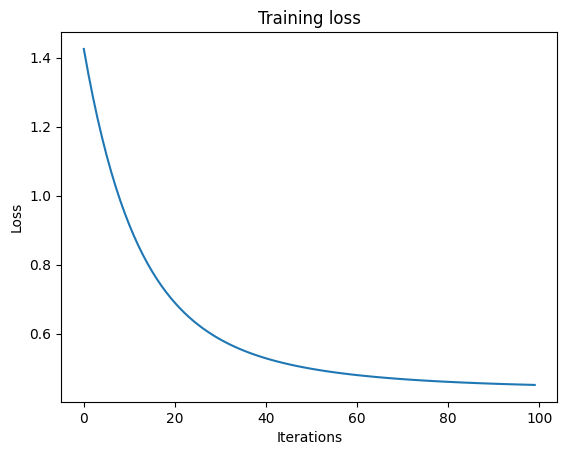

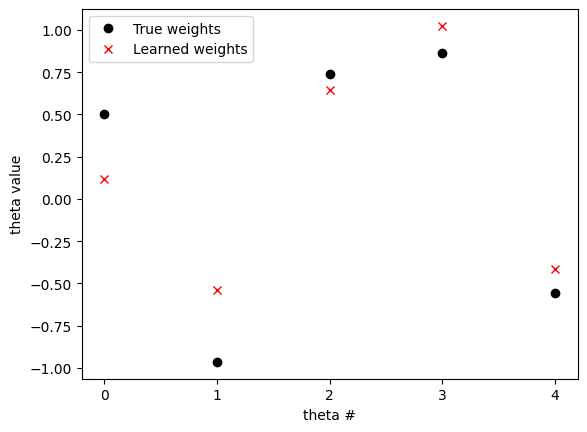

In [16]:
loss_history = [] # track our losses as we update
num_iterations = 100 # how many times we update our parameters
ALPHA = 0.1 # learning rate, this value is usually way smaller for nonlinear models (like 1e-4)

theta = np.random.uniform(-2,2,(d)) # initialize our starting weights

for t in range(num_iterations):
    # in batch gradient descent, we perform the weight update once for the entire training data (all 30 samples of x)
    loss, theta = calculate_gradient_and_update(x, y, theta, ALPHA)
    loss_history.append(loss)

print(f'Final loss: {loss}')

# plot the losses over time
plt.figure(0)
plt.plot(loss_history);
plt.title('Training loss');
plt.xlabel('Iterations');
plt.ylabel('Loss');

# did we recover the true weights?
plt.figure(1)
plt.plot(range(d), theta_true, color = 'black', marker = 'o', linestyle = 'None')
plt.plot(range(d), theta, color = 'red', marker = 'x', linestyle = 'None')
plt.xticks([i for i in range(d)])
plt.xlabel('theta #')
plt.ylabel('theta value')
plt.legend(['True weights','Learned weights'])

### Problem 1: Noise

Our loss is plateauing at some value. Why doesn't it drop to zero? What is the significance of this value? Why can't we recover the true weights? 

Let's do a little experiment...

Text(0, 0.5, 'Final loss')

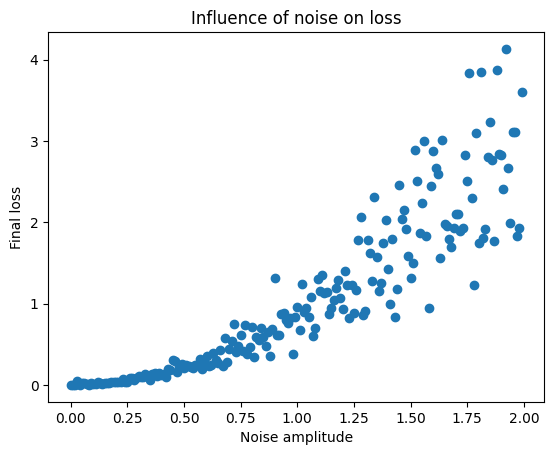

In [17]:
# How does our noise in our dataset relate to our final loss? Well, we can easily plot them against each other so let's start there
noises = np.arange(0,2,0.01) # create an array of noises ranging from 0 to 2, with steps of 0.01
num_iterations = 10
learning_rate = 1 # set this to a unreasonably large number because we are optimizing a convex function and want to converge fast
final_losses = []

for noise in noises:
    x,y,true_weights = generate_dataset(d, n, noise)
    theta = np.random.uniform(-2,2,(d))
    for i in range(num_iterations):
        loss, theta = calculate_gradient_and_update(x, y, theta, 1)
    final_losses.append(loss)

#now plot our final losses against our dataset noise
plt.scatter(noises, final_losses)
plt.title('Influence of noise on loss')
plt.xlabel('Noise amplitude')
plt.ylabel('Final loss')

Work through these problems and discuss your answers.

*1. Derive the relationship you see here, given what you know about our loss function. (Hint: how did we generate y from x?)* <br>
*2. How does the distribution of our training data and weights relate to the amplitude of noise? What common engineering concept can be applied to describe this?* <br>
*3. How do you know your model has learned to approximate some real world function, and not just noise?* <br>
<br>
(FYI, this type of noise in our data is called *aleatoric uncertainty* because it cannot be reduced by collecting more data)

1. Derive the relationship you see here, given what you know about our loss function. <br>
Answer: Mean Squared Error of a normal distribution is the standard deviation squared. You can't predict noise as it's purely random.

2. How does the distribution of our training data and weights relate to the amplitude of noise? What common engineering concept can be applied to describe this? <br>
Answer: Concept is signal-to-noise ratio. A wider distribution of inputs can reduce impact of noise, by increasing the SNR, assuming the noise is homoskedastic. AKA collect better data! <br>
*Homoskedastic refers to a condition in which the variance of the residual, or error term, in a regression model is constant. That is, the error term does not vary much as the value of the predictor variable changes. Another way of saying this is that the variance of the data points is roughly the same for all data points.

3. How do you know your model has learned to approximate some real world function, and not just noise? <br>
Answer: Hard question, but knowing the source of your noise (aka, measurement noise from your instrument) which is baked into your data, can help you answer this. requires actual domain knowledge about your problem to answer.

### Problem 2. Batch vs Stochastic Gradient Descent

Batch gradient descent requires computation of the gradient for every sample of your training data, before updating your parameters. However, this can be computationally inefficient. Stochastic gradient descent (SGD) entails learning on each sample, one at a time. Your model will learn much faster, but runs the risk of destabilizing due to noisy inputs.

Let's adapt the above code to do SGD on our dataset, and observe our loss.

Shape of x before expansion (5,)
Shape of x after np.expand_dims (1, 5)
Final loss: 0.006300020613028106


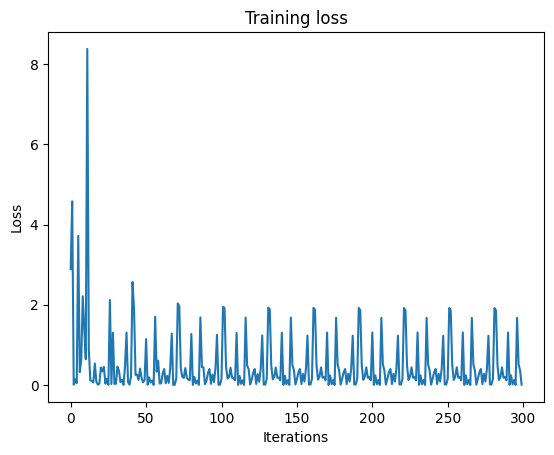

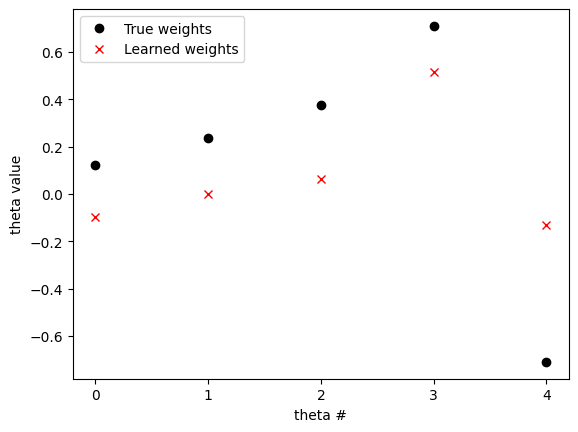

In [18]:
# first, let's regenerate our dataset for convenience
x, y, theta_true = generate_dataset(d, n, 1)

loss_history = []
num_epochs = 10 # how many times we iterate through our whole dataset, element by element
# note: epoch and iteration is different. iteration is the number of times required to go through all training samples. 
# epoch is when all iterations of training samples have been completed.
ALPHA = 0.1 

theta = np.random.uniform(-2,2,(d)) # initialize our starting weights

for e in range(num_epochs):
    for i in range(len(x)):
        # note: see how the x and y inputs to this function is different in this case (SGD) than that of batch gradient descent above. 
        # in the case of batch gradient descent, we fed in the entire 30 samples of x and y matrices,
        # whereas in the case of SGD here, we only feed in x and y one sample at a time
        loss, theta = calculate_gradient_and_update(np.expand_dims(x[i,:],0), np.expand_dims(y[i],0), theta, ALPHA) # we update the size 
        loss_history.append(loss)

# The function calculate_gradient_and_update takes in x and y as 2-dimensional arrays.
# We need to reshape x[i,:] and y[i] from (i,) to (1,i) or (sample, feature) using np.expand_dims(x[i,:],0)
print(f'Shape of x before expansion {np.shape(x[i,:])}')
print(f'Shape of x after np.expand_dims {np.shape(np.expand_dims(x[i,:],0))}')

print(f'Final loss: {loss}')

# plot the losses over time
plt.figure(0)
plt.plot(loss_history);
plt.title('Training loss');
plt.xlabel('Iterations');
plt.ylabel('Loss');

# did we recover the true weights?
plt.figure(1)
plt.plot(range(d), theta_true, color = 'black', marker = 'o', linestyle = 'None')
plt.plot(range(d), theta, color = 'red', marker = 'x', linestyle = 'None')
plt.xticks([i for i in range(d)])
plt.xlabel('theta #')
plt.ylabel('theta value')
plt.legend(['True weights','Learned weights'])

*1. Why do you see a repeated pattern in the loss curve?* <br>
*2. Why is it harder to converge to the true weights?*

1. Why do you see a repeated pattern in the loss curve? <br>
Answer: because SGD loops through each input in the dataset, which provides the same update every time. Randomizing the order of inputs removes this type of periodicity (only matters for neural networks). The spike indicates that there's one sample in the dataset with larger error. Since we didn't randomize sampling, this sample with large error always occurs at a regular period.

2. Why is it harder to converge to the true weights? <br>
Answer: because SGD does not converge smoothly, and can easily "overshoot" the global minimum based on the learning rate. Some training data samples will result in larger updates than others.


### Problem 3. Visualize learning

A visual example of how batch gradient descent and stochastic gradient descent differ can be useful to see. Let's regenerate our dataset, now with just 2 features.

In [19]:
# make our dataset
x, y, theta_true = generate_dataset(2, n, 1)
starting_theta = np.random.uniform(-2,2,(2)) #initialize our starting weights

Let's train on this new dataset using both methods. Make sure to start from the same initial parameters.

In [20]:
# Batch Gradient Descent
theta_history_batch = [] # track our parameters as we update them
num_iterations = 100 # how many times we update our parameters
ALPHA = 0.1 # learning rate, this value is usually way smaller for nonlinear models (like 1e-4)

theta = starting_theta
for t in range(num_iterations):
    _, theta = calculate_gradient_and_update(x, y, theta, ALPHA)
    theta_history_batch.append(theta)

theta_history_batch = np.array(theta_history_batch)

In [21]:
# Stochastic Gradient Descent
theta_history_sgd = []
num_epochs = 10 # how many times we iterate through our whole dataset, element by element
ALPHA = 0.1 

theta = starting_theta
for e in range(num_epochs):
    for i in range(len(x)):
        _, theta = calculate_gradient_and_update(np.expand_dims(x[i,:],0), np.expand_dims(y[i],0), theta, ALPHA) # we update the size 
        theta_history_sgd.append(theta)

theta_history_sgd = np.array(theta_history_sgd)

We can plot the trajectory of our parameters as it travels over the loss landscape.

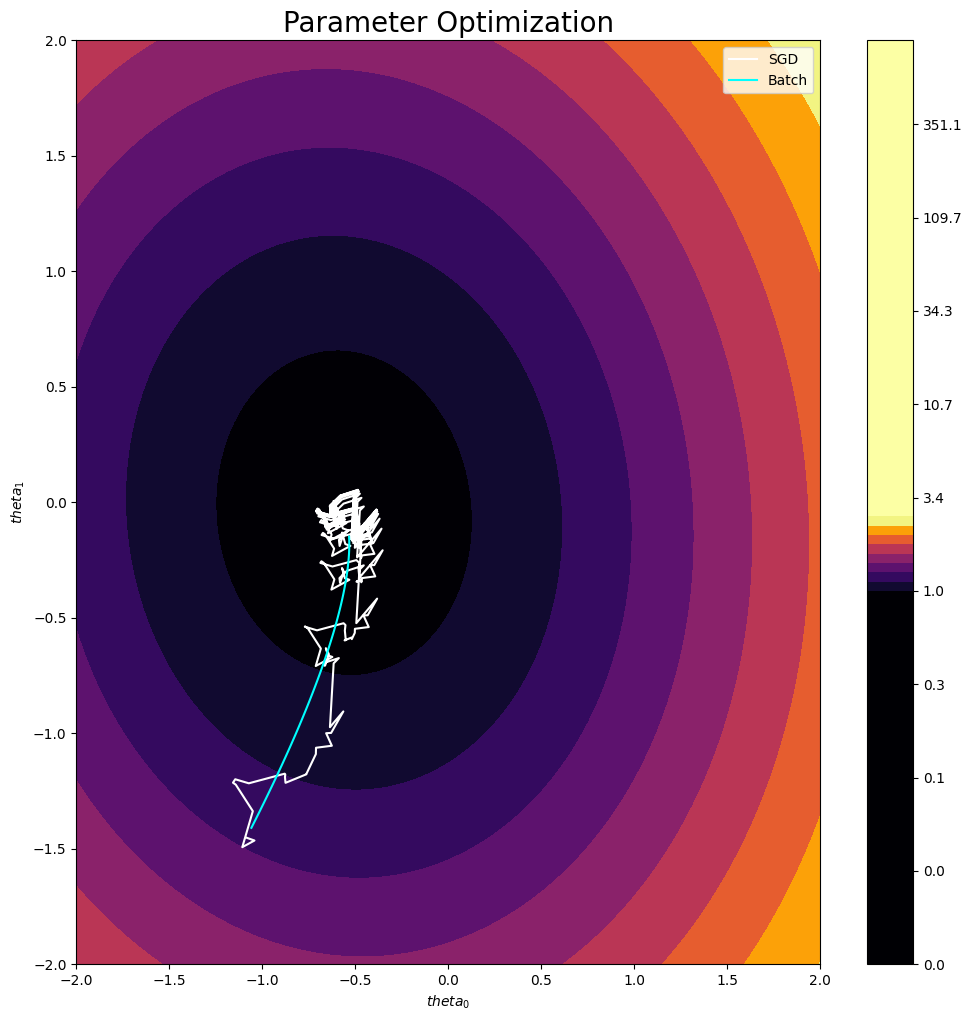

In [22]:
# get the loss landscape

# create the coordinates
param_space = np.linspace(-2,2,100) # define our grid of points to evaluate
theta0, theta1 = np.meshgrid(param_space, param_space)
loss_scape = []

# create the colors / contour
# essentially this is taking 100x100 values of theta, calculate the loss for each of those pairs, and seeing which combo results in the lowest loss
for t0, t1 in zip(np.ravel(theta0), np.ravel(theta1)): # for every coordinate in our grid
    l, _ = calculate_gradient_and_update(x,y,np.array([t0,t1]),1) # calculate loss
    loss_scape.append(l)
loss_scape = np.array(loss_scape).reshape(theta0.shape) # get it back in proper shape

# plot the loss landscape and each training method
plt.figure(0, figsize = (12,12))
plt.title('Parameter Optimization', fontsize = 20)
plt.contourf(theta0, theta1, loss_scape, levels=np.logspace(-2, 3, 100), cmap = 'inferno')
plt.clim(np.min(loss_scape),np.max(loss_scape))
plt.colorbar()
plt.xlabel('$theta_0$')
plt.ylabel('$theta_1$')

plt.plot(theta_history_sgd[:,0],theta_history_sgd[:,1], color = 'white', label = 'SGD')
plt.plot(theta_history_batch[:,0],theta_history_batch[:,1], color = 'cyan', label = 'Batch')
plt.legend()

Talk through and code up answers to the following questions.

*1. Implement a learning rate scheduler for stochastic gradient descent.* <br>
*2. How do you make a scheduler sensitive to learning in real time? Think of the trajectory in physics terms.*

1. Implement a learning rate scheduler for stochastic gradient descent. <br>
Answer: just make the ALPHA parameter iterable so that it gets smaller over time

2. How do you make a scheduler sensitive to learning in real time? Think of the trajectory in physics terms. <br>
Answer: define momentum of learning. basically, use the average (or weighted average) of the last several gradient updates instead of just the current one. makes the SGD line "smoother"


### (BONUS) Problem 4: Gradient descent with a nonlinear function

Real world data is almost always nonlinear. Though we have not yet covered nonlinear models, it is frequent practice to apply a linear model to nonlinear datasets. Let's use a classic function, Himmelblau's function.

$$f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$$

It is commonly used for testing optimization algorithms because it has multiple local minima. To perform gradient descent directly on this function, you need to find the partial derivatives of $f(x, y)$ in terms of both $x$ and $y$. To be clear, there is no cost function to plug in here, we are using the derivative of the Himmelblau function directly as our cost function or **objective function** and minimizing it!

Try deriving these yourself and plugging them in to the code below. Then, the code below shows how gradient descent can result in very different solutions, depending on initial conditions.

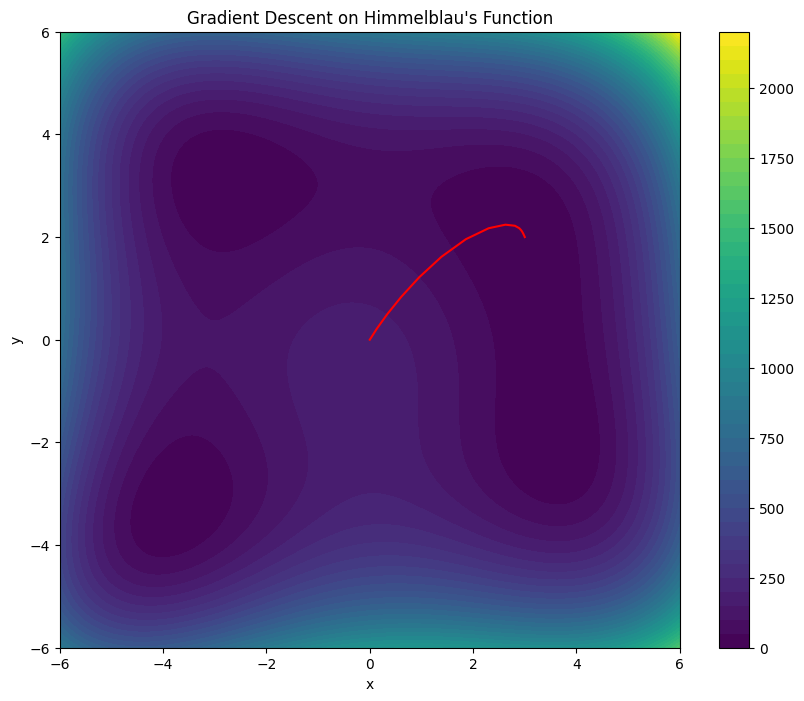

In [23]:
import numpy as np
import matplotlib.pyplot as plt

#t ry updating this and seeing how the trajectory changes
STARTING_COORDS = (0,0)

def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def himmelblau_gradient_descent(lr=0.01, n_iterations=1000, init_point=(-4, 4)):
    x, y = init_point
    history = [(x, y)]
    
    for _ in range(n_iterations):
        gradient_x = 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7)
        gradient_y = 2*(x**2 + y - 11) + 4*y*(x + y**2 - 7)
        
        x -= lr * gradient_x
        y -= lr * gradient_y
        
        history.append((x, y))
        
    return np.array(history)

history = himmelblau_gradient_descent(lr=0.01, n_iterations=100, init_point=(0,0)) # why does increasing learning rate throw an error?

# Visualizing the optimization path
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, 50, cmap='viridis')
plt.colorbar()
plt.plot(history[:, 0], history[:, 1], c='red')  # plotting the path
plt.title("Gradient Descent on Himmelblau's Function")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Answer to bonus

Try deriving this yourself first.

        gradient_x = 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7)
        gradient_y = 2*(x**2 + y - 11) + 4*y*(x + y**2 - 7)